# The Existence and Nature of Twitter Echo Chambers

Work in progress. Clean Twitter data to use machine learning to find political echo chambers on Twitter.

In [1]:
import numpy as np
import pandas as pd
import json
import re
import utils as ut
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
reload(ut)

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<module 'utils' from 'utils.pyc'>

In [7]:
filename = '/run/media/derekgm@byu.local/FAMHIST/Data/final_project/trump2.txt'
#filename = '/run/media/derekgm@byu.local/FAMHIST/Data/final_project/maga.txt'
#filename = '/media/derek/FAMHIST/Data/final_project/trump2.txt'
#filename = '/media/derek/FAMHIST/Data/final_project/maga.txt'
F = open(filename,'r')
tweets = F.readlines()[:1500]
F.close()

In [8]:
L = []
names = []
D = {}
err = 0
print len(tweets)
for t in tweets:
    try:
        text = json.loads(t)
        mentions = re.findall(r'@\w*',text['text'].encode('ascii','ignore'))
        uname = text['user']['screen_name'].encode('ascii','ignore')
        if not uname in D.keys():
            D[uname] = []
        if mentions is not None:
            for m in mentions:
                D[uname].append(m[1:])
                names.append([uname,m[1:]])
                L.append({"source":uname,"target":m[1:],"value":1}) #2**D[uname].count(m[1:])})
    except:
        err += 1
print err

1500
4


In [9]:
D2 = {}
L2 = []
for i in np.unique(np.array(names).flatten()):
    L2.append({"id":i,"group":1})
D2['nodes'] = L2
D2['links'] = L

In [10]:
print len(np.unique(np.array(names).flatten()))

1743


In [11]:
str_json = json.JSONEncoder().encode(D2)
F_write = open('twitter.json','w')
F_write.write(str_json)
F_write.close()

In [27]:
# df = pd.DataFrame(L)
# newdf = df[df['value']>8].groupby(['source','target'])
# newdf.count()#.to_dict()

In [17]:
djt = ut.load_candidate(1500000,1600000)
hrc = ut.load_candidate(1500000,1600000)


	Options

            1: trump from lab computer

            2: trump from linux mint

            3: clinton from lab computer

            4: clinton from linux mint


Enter number >> 1
Loading file...

Errors: 0
Time: 18.0819821358

clean_text
Time: 1.0396130085

convert time
Time: 0.267141103745

	Options

            1: trump from lab computer

            2: trump from linux mint

            3: clinton from lab computer

            4: clinton from linux mint


Enter number >> 3
Loading file...

Errors: 0
Time: 14.5035920143

clean_text
Time: 1.06139087677

convert time
Time: 0.27539396286


In [21]:
djt_df = djt.make_df()
hrc_df = hrc.make_df()

In [22]:
djt_df['RT'].mean()

0.69686

In [23]:
hrc_df['RT'].mean()

0.72216

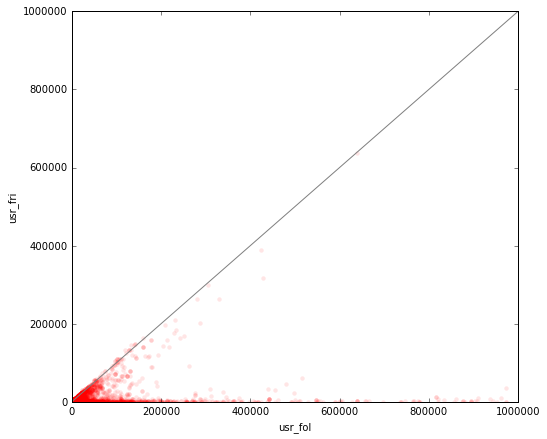

In [25]:
djt_df.plot(kind='scatter',x='usr_fol',y='usr_fri',color='r',linewidth=0,alpha=.1,figsize=(8,7))
x = np.linspace(-5,1000000,len(djt_df))
plt.plot(x,x,color='grey')
plt.ylim(-5,1000000)
plt.xlim(-5,1000000)
plt.show()

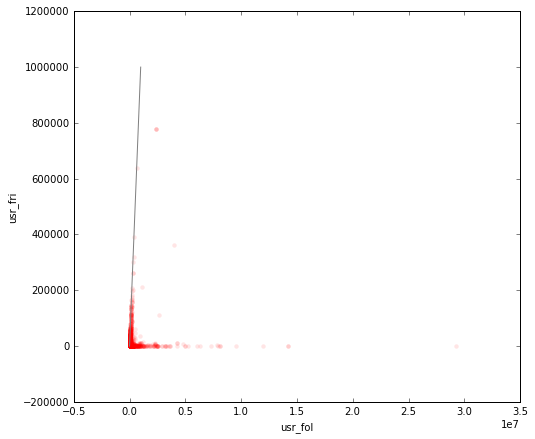

In [27]:
djt_df.plot(kind='scatter',x='usr_fol',y='usr_fri',color='r',linewidth=0,alpha=.1,figsize=(8,7))
plt.plot(x,x,color='grey')
plt.show()